### Visualización de datos

Visualización de datos una vez están limpios y antes de colocar las flagas

In [15]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os as os
import math

#TODO Introducir el dataset con el que se vaya a trabajar
station = 'jci'
df = pd.read_csv(f'./flagged_data/{station}_flagged.csv')

df['date'] = pd.to_datetime(df['date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 168528 entries, 0 to 168527
Data columns (total 15 columns):
 #   Column    Non-Null Count   Dtype              
---  ------    --------------   -----              
 0   date      168528 non-null  datetime64[ns, UTC]
 1   temp      152432 non-null  float64            
 2   skt       158459 non-null  float64            
 3   dir       158187 non-null  float64            
 4   vel       158999 non-null  float64            
 5   hr        152241 non-null  float64            
 6   prec      163318 non-null  float64            
 7   pres      152917 non-null  float64            
 8   temp_jci  168528 non-null  int64              
 9   skt_jci   168528 non-null  int64              
 10  dir_jci   168528 non-null  int64              
 11  vel_jci   168528 non-null  int64              
 12  hr_jci    168528 non-null  int64              
 13  prec_jci  168528 non-null  int64              
 14  pres_jci  168528 non-null  int64              
dtype

Obteniendo gráficas generales
Graficar temp en el primer eje Y (ax)
Graficar skt en el primer eje Y (ax)
Graficar dir en el primer eje Y (ax)
Graficar vel en el primer eje Y (ax)
Graficar hr en el primer eje Y (ax)
Graficar prec en el primer eje Y (ax)
Graficar pres en el primer eje Y (ax)


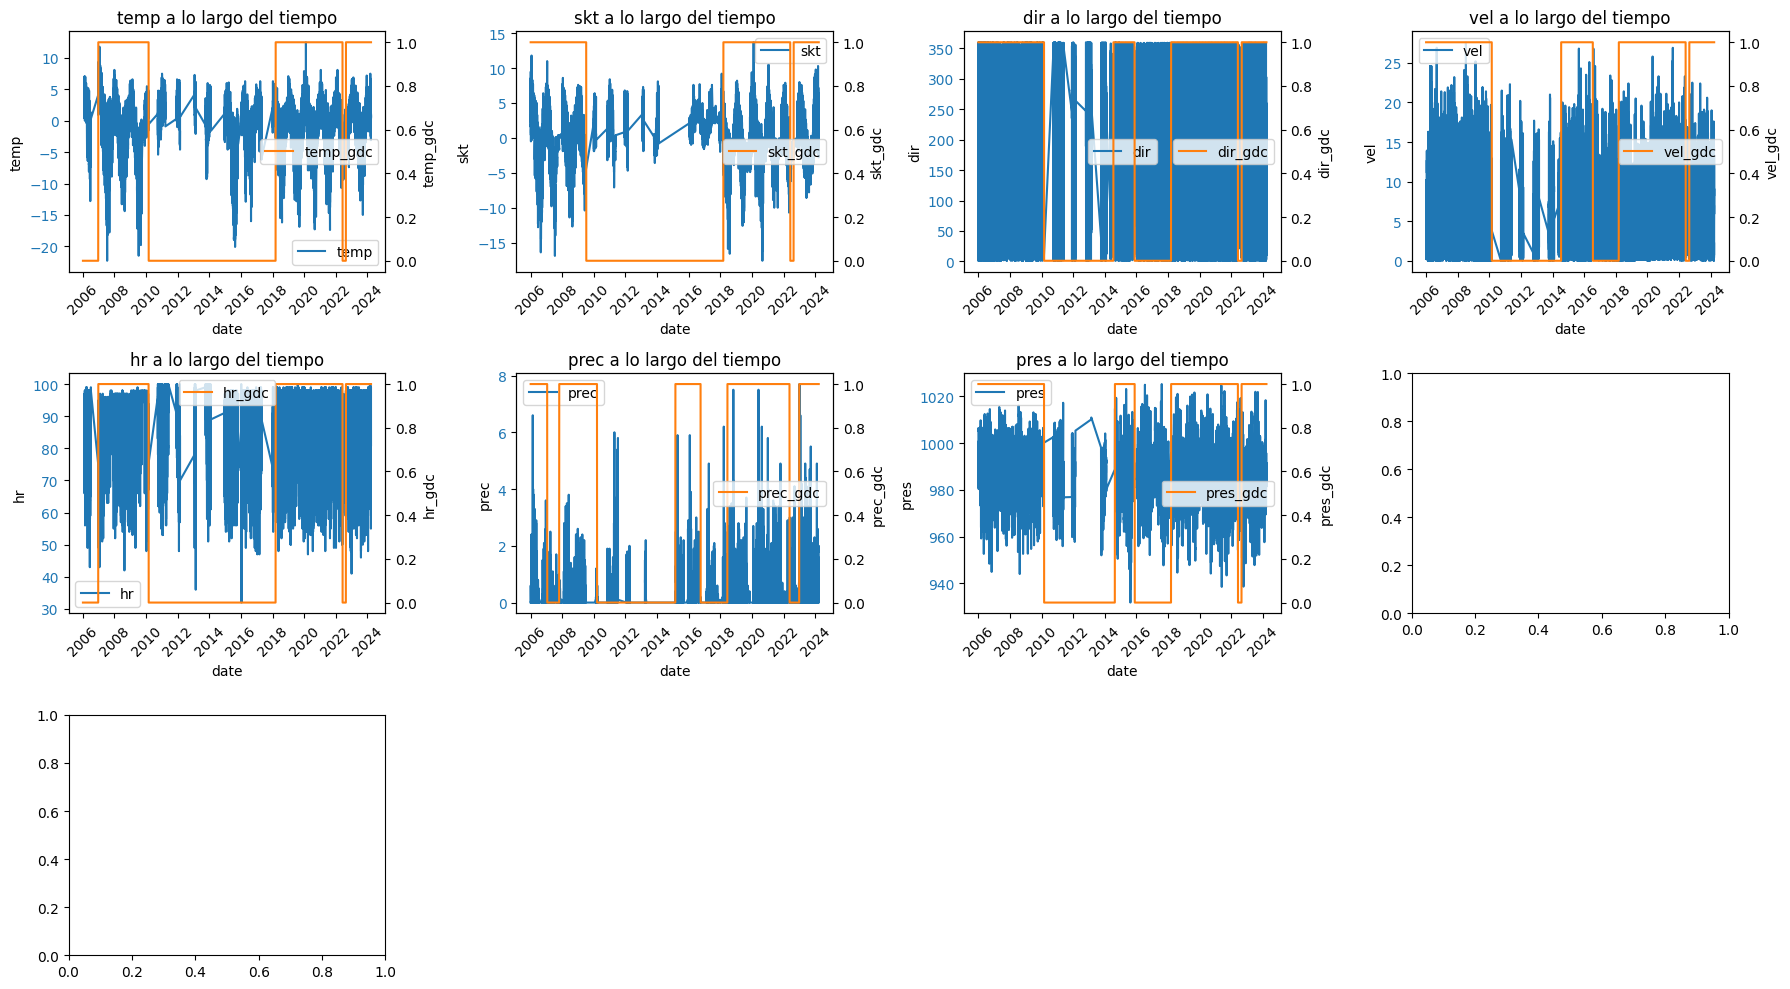

In [14]:
df['date'] = pd.to_datetime(df['date'])
print ('Obteniendo gráficas generales')
num_cols = 3
num_rows = 3

fig, axes = plt.subplots(nrows=num_rows, ncols=4, figsize=(18, 10))  # Ajusta el tamaño de la figura según el número de filas


# Aplanar el array de ejes para poder iterar sobre él
axes = axes.flatten()

# Iterar sobre las columnas (excluyendo 'fhora') y generar gráficos
for ax, col in zip(axes, df.columns.drop('date')):
    station_col = f'{col}_{station}'  # Columna con el nombre de la estación

    if station_col in df.columns:  # Verificar si la columna _station existe
        print(f'Graficar {col} en el primer eje Y (ax)')
        
        # Primer eje Y para la columna principal
        color = 'tab:blue'
        ax.set_xlabel('date')
        # ax.set_ylabel(col, color=color)
        sns.lineplot(x=df['date'], y=df[col], ax=ax, color=color, label=col)
        ax.tick_params(axis='y', labelcolor=color)
        ax.set_title(f'{col} a lo largo del tiempo')

        # Segundo eje Y para la columna _station
        ax2 = ax.twinx()  
        color = 'tab:orange'
        # ax2.set_ylabel(station_col, color=color)
        sns.lineplot(x=df['date'], y=df[station_col], ax=ax2, color=color, label=station_col)
        # ax2.tick_params(axis='y', labelcolor=color)

        # Rotar las etiquetas del eje X para mejor legibilidad
        ax.tick_params(axis='x', rotation=45)
        
# Eliminar los ejes sobrantes si el número de columnas no es múltiplo de 6
for i in range(8, len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.savefig(f'resource/valid/flagged_{station}.png')
plt.show()